# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [22]:
# Predictor
X = data.drop(columns=['MEDV'])
print("Head of X:\n", pd.DataFrame(X).head())

# Response
y = data["MEDV"]
print("Head of y:\n", pd.DataFrame(y).head())

# Import train_test_split to split the data
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Head of X:
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
Head of y:
    MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2
Shape of X_train: (404, 13)
Shape of y_train: (404,)
Shape of X_test: (102, 13)
Shape of y_test: (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [34]:
# Import the Linear Regression class
from sklearn.linear_model import LinearRegression

# Initialise the model
model = LinearRegression()

# Fit the model with the training and test sets
model.fit(X_train, y_train)

# Predict on the test and train sets to compare later on
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [ ]:
# Import the r2 score module
from sklearn.metrics import r2_score

# Compute the r2 for the test and train sets
r2_train = r2_score(y_train, y_pred_train)
print(f"r2 score for train: ", round(r2_train, 2))

r2_test = r2_score(y_test, y_pred_test)
print(f"r2 score for test: ", round(r2_test, 2))

r2 score for train:  0.75
r2 score for test:  0.67


## 4. Calculate and print mean squared error for both the training and the testing set.

In [41]:
# Import the r2 score module
from sklearn.metrics import mean_squared_error

# Compute the r2 for the test and train sets
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"MSE for train: ", round(mse_train, 2))

mse_test = mean_squared_error(y_test, y_pred_test)
print(f"MSE for test: ", round(mse_test, 2))

MSE for train:  21.64
MSE for test:  24.29


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [42]:
# Import the r2 score module
from sklearn.metrics import mean_absolute_error

# Compute the r2 for the test and train sets
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f"MSE for train: ", round(mae_train, 2))

mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"MSE for test: ", round(mae_test, 2))

MSE for train:  3.31
MSE for test:  3.19


## Classification Model Evaluation

In [63]:
from sklearn.datasets import load_iris
data = load_iris()

In [61]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [45]:
column_names = data.feature_names

In [46]:
df = pd.DataFrame(data['data'],columns=column_names)

In [47]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
target = pd.DataFrame(data.target)

In [68]:
target

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [49]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [50]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [72]:
# Predictor
X = df
# print("Head of X:\n", pd.DataFrame(X).head())

# Response
y = data['target']
# print("Head of y:\n", pd.DataFrame(y).head())

# Import train_test_split to split the data
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (120, 4)
Shape of y_train: (120,)
Shape of X_test: (30, 4)
Shape of y_test: (30,)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [73]:
# Import the Linear Regression class
from sklearn.linear_model import LogisticRegression

# Initialise the model
model = LogisticRegression()

# Fit the model with the training and test sets
model.fit(X_train, y_train)

# Predict on the test and train sets to compare later on
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [75]:
# Import the r2 score module
from sklearn.metrics import accuracy_score

# Compute the r2 for the test and train sets
ac_train = accuracy_score(y_train, y_pred_train)
print(f"AC for train: ", round(ac_train, 2))

ac_test = accuracy_score(y_test, y_pred_test)
print(f"AC for test: ", round(ac_test, 2))

AC for train:  0.97
AC for test:  1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [76]:
# Import the r2 score module
from sklearn.metrics import balanced_accuracy_score

# Compute the r2 for the test and train sets
bac_train = balanced_accuracy_score(y_train, y_pred_train)
print(f"BAC for train: ", round(bac_train, 2))

bac_test = balanced_accuracy_score(y_test, y_pred_test)
print(f"BAC for test: ", round(bac_test, 2))

BAC for train:  0.98
BAC for test:  1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [79]:
# Import the r2 score module
from sklearn.metrics import precision_score

# Compute the r2 for the test and train sets
ps_train = precision_score(y_train, y_pred_train, average="micro")
print(f"PS for train: ", round(ps_train, 2))

ps_test = precision_score(y_test, y_pred_test, average="micro")
print(f"PS for test: ", round(ps_test, 2))

PS for train:  0.97
PS for test:  1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [81]:
# Import the r2 score module
from sklearn.metrics import recall_score

# Compute the r2 for the test and train sets
rc_train = recall_score(y_train, y_pred_train, average="micro")
print(f"RC for train: ", round(rc_train, 2))

rc_test = recall_score(y_test, y_pred_test, average="micro")
print(f"RC for test: ", round(rc_test, 2))

RC for train:  0.97
RC for test:  1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [ ]:
# Import the r2 score module
from sklearn.metrics import f1_score

# Compute the r2 for the test and train sets
f1_train = f1_score(y_train, y_pred_train, average="micro")
print(f"F1 for train: ", round(f1_train, 2))

f1_test = f1_score(y_test, y_pred_test, average="micro")
print(f"F1 for test: ", round(f1_test, 2))

F1 for train:  0.97
F1 for test:  1.0


## 13. Generate confusion matrices for both the training and the testing set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



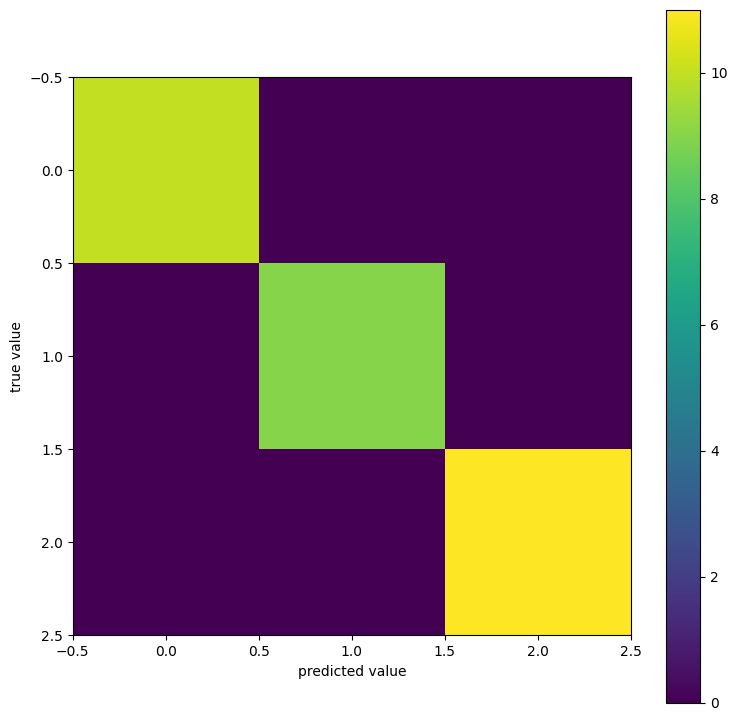

In [85]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB

def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    

yhat_test = y_test.copy()

plot_confusion_matrix(yhat_test, y_test)
print (metrics.classification_report(yhat_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



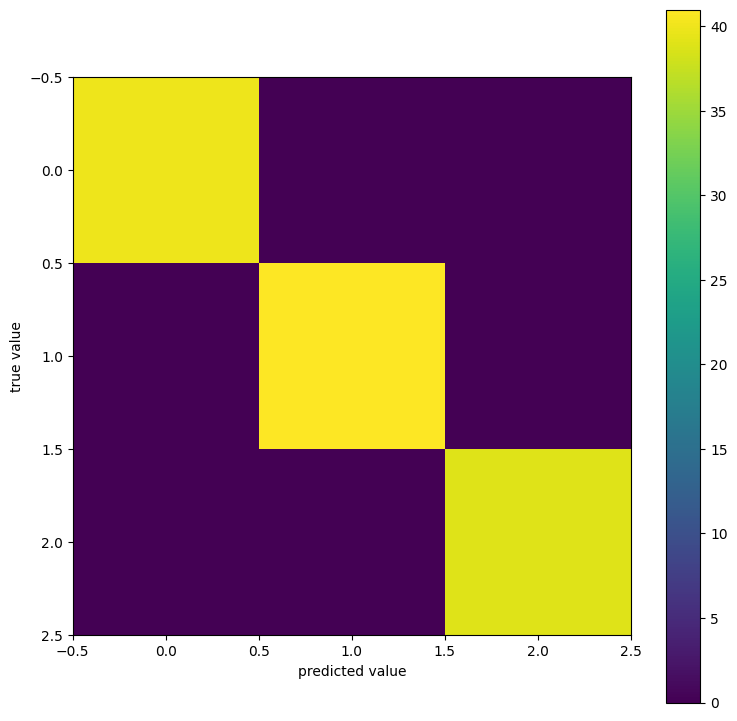

In [86]:
yhat_train = y_train.copy()

plot_confusion_matrix(yhat_train, y_train)
print (metrics.classification_report(yhat_train, y_train))

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !